<img src="ost_logo.png" width="240" height="240" align="right"/>
<div style="text-align: left"> <b> Machine Learning </b> <br> MSE FTP MachLe <br> 
<a href="mailto:christoph.wuersch@ost.ch"> Christoph Würsch </a> </div>

# Gradient Descent
Adaped from [D2L.ai: Interactive Deep Learning Book with Multi-Framework Code, Math, and Discussions](https://github.com/d2l-ai/d2l-en/tree/master)

In this section we are going to introduce the basic concepts underlying *gradient descent*.
Although it is rarely used directly in deep learning, an understanding of gradient descent is key to understanding stochastic gradient descent algorithms. 
For instance, the optimization problem might diverge due to an overly large learning rate. This phenomenon can already be seen in gradient descent. Likewise, preconditioning is a common technique in gradient descent and carries over to more advanced algorithms.
Let us start with a simple special case.

In [1]:
# !pip install torch==2.0.0 torchvision==0.15.1
# !pip install d2l==1.0.3

## Derivation of Gradient Descent Rule Using Quadratic Approximation

In this derivation, we will use a quadratic approximation of the objective function to derive the gradient descent update rule.
Given an objective function $f(x)$, we seek to iteratively update $x$ such that $f(x)$ decreases. At each step, we can approximate $f(x)$ around the current point $x_t$ using a first-order Taylor expansion:

$$
f(x_{t+1}) \approx f(x_t) + \nabla f(x_t)^T (x_{t+1} - x_t).
$$

To simplify this notation, define the step update $\Delta x_t = x_{t+1} - x_t$. This leads to the following approximation:

$$
f(x_{t+1}) \approx f(x_t) + \nabla f(x_t)^T \Delta x_t.
$$

At this point, we want to minimize this approximation. However, we must prevent the update $\Delta x_t$ from being too large, which could lead to divergence. Therefore, we add a quadratic penalty to the step size to control the size of $\Delta x_t$. The resulting minimization problem is:

$$
\min_{\Delta x_t} \left[ f(x_t) + \nabla f(x_t)^T \Delta x_t + \frac{1}{2\eta} \|\Delta x_t\|^2 \right].
$$

Here, $\eta > 0$ is a step size parameter that controls how large a step we take.

### Minimizing the Quadratic Approximation

To find the update $\Delta x_t$, we take the gradient of the objective function with respect to $\Delta x_t$ and set it to zero:

$$
\nabla_{\Delta x_t} \left[ \nabla f(x_t)^T \Delta x_t + \frac{1}{2\eta} \|\Delta x_t\|^2 \right] = 0.
$$

This results in the following equation:

$$
\nabla f(x_t) + \frac{1}{\eta} \Delta x_t = 0.
$$

Solving for $\Delta x_t$, we obtain:

$$
\Delta x_t = -\eta \nabla f(x_t).
$$

Thus, the gradient descent rule can be derived by minimizing the quadratic approximation of the objective function at each iteration, leading to the following update rule:

$$
\boxed{
x_{t+1} = x_t - \eta \nabla f(x_t)}
$$

where $\eta$ is the step size (learning rate), and $\nabla f(x_t)$ is the gradient of the function at the current point $x_t$.

### Example: Gradient Descent on $f(x) = (x - 2)^2 + 3 + 5 \sin(x)$

To illustrate this algorithm, let's apply gradient descent to minimize the function $f(x) = (x - 2)^2 + 3+5\sin(x)$. The global minimum is approximately at $x = 2$, and we can use the following Python implementation to visualize how gradient descent converges to this point.


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the objective function and its derivative
def f(x):
    return (x-2)**2 + 3 + 5*np.sin(x)

def f_prime(x):
    return 2*(x-2)+5*np.cos(x)

# Gradient descent algorithm
def gradient_descent(x0, eta, iterations):
    x_values = [x0]
    for _ in range(iterations):
        x0 = x0 - eta * f_prime(x0)
        x_values.append(x0)
    return x_values

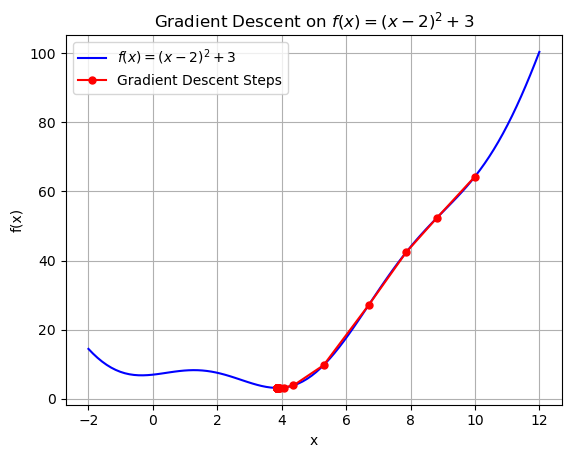

In [3]:
# Parameters
x0 = 10  # Initial starting point
eta = 0.1  # Step size (learning rate)
iterations = 30  # Number of iterations

# Perform gradient descent
x_values = gradient_descent(x0, eta, iterations)

# Generate data for plotting the function
x = np.linspace(-2, 12, 100)
y = f(x)

# Plot the function and the gradient descent steps
plt.plot(x, y, label='$f(x) = (x-2)^2 + 3$', color='blue')
plt.plot(x_values, f(np.array(x_values)), 'ro-', label='Gradient Descent Steps', markersize=5)
plt.title('Gradient Descent on $f(x) = (x-2)^2 + 3$')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

The optimization problem might diverge due to an overly large learning rate. This phenomenon can already be seen in gradient descent. Likewise, preconditioning is a common technique in gradient descent and carries over to more advanced algorithms.
Let's start with a simple special case. This means that, if we use

$$x \leftarrow x - \eta f'(x)$$

to iterate $x$, the value of function $f(x)$ might decline. Therefore, in gradient descent we first choose an initial value $x$ and a constant $\eta > 0$ and then use them to continuously iterate $x$ until the stop condition is reached, for example, when the magnitude of the gradient $|f'(x)|$ is small enough or the number of iterations has reached a certain value.

For simplicity we choose the objective function $f(x)=x^2$ to illustrate how to implement gradient descent. Although we know that $x=0$ is the solution to minimize $f(x)$, we still use this simple function to observe how $x$ changes.


In [4]:
%matplotlib inline
import numpy as np
import torch
from d2l import torch as d2l

ModuleNotFoundError: No module named 'torch'

In [ ]:
def f(x):  # Objective function
    return x ** 2

def f_grad(x):  # Gradient (derivative) of the objective function
    return 2 * x

Next, we use $x=10$ as the initial value and assume $\eta=0.2$. Using gradient descent to iterate $x$ for 10 times we can see that, eventually, the value of $x$ approaches the optimal solution.


In [ ]:
def gd(eta, f_grad):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x)
        results.append(float(x))
    print(f'epoch 10, x: {x:f}')
    return results

results = gd(0.2, f_grad)

The progress of optimizing over $x$ can be plotted as follows.


In [ ]:
def show_trace(results, f):
    n = max(abs(min(results)), abs(max(results)))
    f_line = torch.arange(-n, n, 0.01)
    d2l.set_figsize()
    d2l.plot([f_line, results], [[f(x) for x in f_line], [
        f(x) for x in results]], 'x', 'f(x)', fmts=['-', '-o'])

show_trace(results, f)

### Learning Rate
:label:`subsec_gd-learningrate`

The learning rate $\eta$ can be set by the algorithm designer. If we use a learning rate that is too small, it will cause $x$ to update very slowly, requiring more iterations to get a better solution. To show what happens in such a case, consider the progress in the same optimization problem for $\eta = 0.05$. As we can see, even after 10 steps we are still very far from the optimal solution.


In [ ]:
show_trace(gd(0.05, f_grad), f)

Conversely, if we use an excessively high learning rate, $\left|\eta f'(x)\right|$ might be too large for the first-order Taylor expansion formula. That is, the term $\mathcal{O}(\eta^2 f'^2(x))$ in :eqref:`gd-taylor-2` might become significant. In this case, we cannot guarantee that the iteration of $x$ will be able to lower the value of $f(x)$. For example, when we set the learning rate to $\eta=1.1$, $x$ overshoots the optimal solution $x=0$ and gradually diverges.


In [ ]:
show_trace(gd(1.1, f_grad), f)

### Local Minima

To illustrate what happens for nonconvex functions consider the case of $f(x) = x \cdot \cos(cx)$ for some constant $c$. This function has infinitely many local minima. Depending on our choice of the learning rate and depending on how well conditioned the problem is, we may end up with one of many solutions. The example below illustrates how an (unrealistically) high learning rate will lead to a poor local minimum.


In [ ]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

show_trace(gd(2, f_grad), f)

## Multivariate Gradient Descent

Now that we have a better intuition of the univariate case, let's consider the situation where $\mathbf{x} = [x_1, x_2, \ldots, x_d]^\top$. That is, the objective function $f: \mathbb{R}^d \to \mathbb{R}$ maps vectors into scalars. Correspondingly its gradient is multivariate, too. It is a vector consisting of $d$ partial derivatives:

$$\nabla f(\mathbf{x}) = \bigg[\frac{\partial f(\mathbf{x})}{\partial x_1}, \frac{\partial f(\mathbf{x})}{\partial x_2}, \ldots, \frac{\partial f(\mathbf{x})}{\partial x_d}\bigg]^\top.$$

Each partial derivative element $\partial f(\mathbf{x})/\partial x_i$ in the gradient indicates the rate of change of $f$ at $\mathbf{x}$ with respect to the input $x_i$. As before in the univariate case we can use the corresponding Taylor approximation for multivariate functions to get some idea of what we should do. In particular, we have that

$$f(\mathbf{x} + \boldsymbol{\epsilon}) = f(\mathbf{x}) + \mathbf{\boldsymbol{\epsilon}}^\top \nabla f(\mathbf{x}) + \mathcal{O}(\|\boldsymbol{\epsilon}\|^2).$$
:eqlabel:`gd-multi-taylor`

In other words, up to second-order terms in $\boldsymbol{\epsilon}$ the direction of steepest descent is given by the negative gradient $-\nabla f(\mathbf{x})$. Choosing a suitable learning rate $\eta > 0$ yields the prototypical gradient descent algorithm:

$$\mathbf{x} \leftarrow \mathbf{x} - \eta \nabla f(\mathbf{x}).$$

To see how the algorithm behaves in practice let's construct an objective function $f(\mathbf{x})=x_1^2+2x_2^2$ with a two-dimensional vector $\mathbf{x} = [x_1, x_2]^\top$ as input and a scalar as output. The gradient is given by $\nabla f(\mathbf{x}) = [2x_1, 4x_2]^\top$. We will observe the trajectory of $\mathbf{x}$ by gradient descent from the initial position $[-5, -2]$.

To begin with, we need two more helper functions. The first uses an update function and applies it 20 times to the initial value. The second helper visualizes the trajectory of $\mathbf{x}$.


In [ ]:
def train_2d(trainer, steps=20, f_grad=None):  #@save
    """Optimize a 2D objective function with a customized trainer."""
    # `s1` and `s2` are internal state variables that will be used in Momentum, adagrad, RMSProp
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(steps):
        if f_grad:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2, f_grad)
        else:
            x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
    print(f'epoch {i + 1}, x1: {float(x1):f}, x2: {float(x2):f}')
    return results

In [ ]:
def show_trace_2d(f, results):  #@save
    """Show the trace of 2D variables during optimization."""
    d2l.set_figsize()
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = torch.meshgrid(torch.arange(-5.5, 1.0, 0.1),
                          torch.arange(-3.0, 1.0, 0.1), indexing='ij')
    d2l.plt.contour(x1, x2, f(x1, x2), colors='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

Next, we observe the trajectory of the optimization variable $\mathbf{x}$ for learning rate $\eta = 0.1$. We can see that after 20 steps the value of $\mathbf{x}$ approaches its minimum at $[0, 0]$. Progress is fairly well-behaved albeit rather slow.


In [ ]:
def f_2d(x1, x2):  # Objective function
    return x1 ** 2 + 2 * x2 ** 2

def f_2d_grad(x1, x2):  # Gradient of the objective function
    return (2 * x1, 4 * x2)

def gd_2d(x1, x2, s1, s2, f_grad):
    g1, g2 = f_grad(x1, x2)
    return (x1 - eta * g1, x2 - eta * g2, 0, 0)

eta = 0.1
show_trace_2d(f_2d, train_2d(gd_2d, f_grad=f_2d_grad))

## Adaptive Methods

As we could see in :numref:`subsec_gd-learningrate`, getting the learning rate $\eta$ "just right" is tricky. If we pick it too small, we make little progress. If we pick it too large, the solution oscillates and in the worst case it might even diverge. What if we could determine $\eta$ automatically or get rid of having to select a learning rate at all?
Second-order methods that look not only at the value and gradient of the objective function
but also at its *curvature* can help in this case. While these methods cannot be applied to deep learning directly due to the computational cost, they provide useful intuition into how to design advanced optimization algorithms that mimic many of the desirable properties of the algorithms outlined below.


### Newton's Method

Reviewing the Taylor expansion of some function $f: \mathbb{R}^d \rightarrow \mathbb{R}$ there is no need to stop after the first term. In fact, we can write it as

$$f(\mathbf{x} + \boldsymbol{\epsilon}) = f(\mathbf{x}) + \boldsymbol{\epsilon}^\top \nabla f(\mathbf{x}) + \frac{1}{2} \boldsymbol{\epsilon}^\top \nabla^2 f(\mathbf{x}) \boldsymbol{\epsilon} + \mathcal{O}(\|\boldsymbol{\epsilon}\|^3).$$
:eqlabel:`gd-hot-taylor`

To avoid cumbersome notation we define $\mathbf{H} \stackrel{\textrm{def}}{=} \nabla^2 f(\mathbf{x})$ to be the Hessian of $f$, which is a $d \times d$ matrix. For small $d$ and simple problems $\mathbf{H}$ is easy to compute. For deep neural networks, on the other hand, $\mathbf{H}$ may be prohibitively large, due to the cost of storing $\mathcal{O}(d^2)$ entries. Furthermore it may be too expensive to compute via backpropagation. For now let's ignore such considerations and look at what algorithm we would get.

After all, the minimum of $f$ satisfies $\nabla f = 0$.
Following calculus rules in :numref:`subsec_calculus-grad`,
by taking derivatives of :eqref:`gd-hot-taylor` with regard to $\boldsymbol{\epsilon}$ and ignoring higher-order terms we arrive at

$$\nabla f(\mathbf{x}) + \mathbf{H} \boldsymbol{\epsilon} = 0 \textrm{ and hence }
\boldsymbol{\epsilon} = -\mathbf{H}^{-1} \nabla f(\mathbf{x}).$$

That is, we need to invert the Hessian $\mathbf{H}$ as part of the optimization problem.

As a simple example, for $f(x) = \frac{1}{2} x^2$ we have $\nabla f(x) = x$ and $\mathbf{H} = 1$. Hence for any $x$ we obtain $\epsilon = -x$. In other words, a *single* step is sufficient to converge perfectly without the need for any adjustment! Alas, we got a bit lucky here: the Taylor expansion was exact since $f(x+\epsilon)= \frac{1}{2} x^2 + \epsilon x + \frac{1}{2} \epsilon^2$.

Let's see what happens in other problems.
Given a convex hyperbolic cosine function $f(x) = \cosh(cx)$ for some constant $c$, we can see that
the global minimum at $x=0$ is reached
after a few iterations.


In [ ]:
c = torch.tensor(0.5)

def f(x):  # Objective function
    return torch.cosh(c * x)

def f_grad(x):  # Gradient of the objective function
    return c * torch.sinh(c * x)

def f_hess(x):  # Hessian of the objective function
    return c**2 * torch.cosh(c * x)

def newton(eta=1):
    x = 10.0
    results = [x]
    for i in range(10):
        x -= eta * f_grad(x) / f_hess(x)
        results.append(float(x))
    print('epoch 10, x:', x)
    return results

show_trace(newton(), f)

Now let's consider a *nonconvex* function, such as $f(x) = x \cos(c x)$ for some constant $c$. After all, note that in Newton's method we end up dividing by the Hessian. This means that if the second derivative is *negative* we may walk into the direction of *increasing* the value of $f$.
That is a fatal flaw of the algorithm.
Let's see what happens in practice.


In [ ]:
c = torch.tensor(0.15 * np.pi)

def f(x):  # Objective function
    return x * torch.cos(c * x)

def f_grad(x):  # Gradient of the objective function
    return torch.cos(c * x) - c * x * torch.sin(c * x)

def f_hess(x):  # Hessian of the objective function
    return - 2 * c * torch.sin(c * x) - x * c**2 * torch.cos(c * x)

show_trace(newton(), f)

This went spectacularly wrong. How can we fix it? One way would be to "fix" the Hessian by taking its absolute value instead. Another strategy is to bring back the learning rate. This seems to defeat the purpose, but not quite. Having second-order information allows us to be cautious whenever the curvature is large and to take longer steps whenever the objective function is flatter.
Let's see how this works with a slightly smaller learning rate, say $\eta = 0.5$. As we can see, we have quite an efficient algorithm.
